In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Tharun\Downloads\abalone.csv")

## Load the dataset into the tool

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

## Perform Below Visualizations.
*  Univariate Analysis
* Bi-Variate Analysis
* Multi-Variate Analysis

<AxesSubplot:>

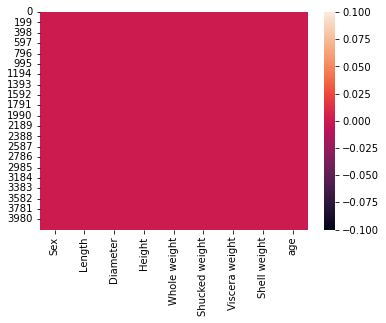

In [8]:
sns.heatmap(df.isnull())

In [10]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\Tharun\AppData\Local\Temp/ipykernel_20216/3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [11]:
categorical_features

Index(['Sex'], dtype='object')

<AxesSubplot:>

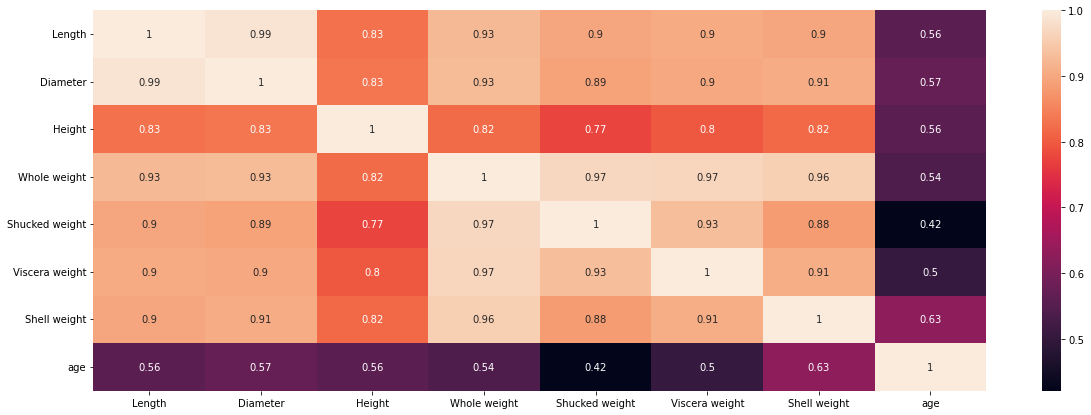

In [12]:
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

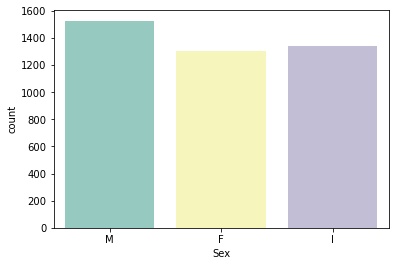

In [13]:
sns.countplot(x = 'Sex', data = df, palette = 'Set3')

D:\py\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\py\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\py\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='age'>

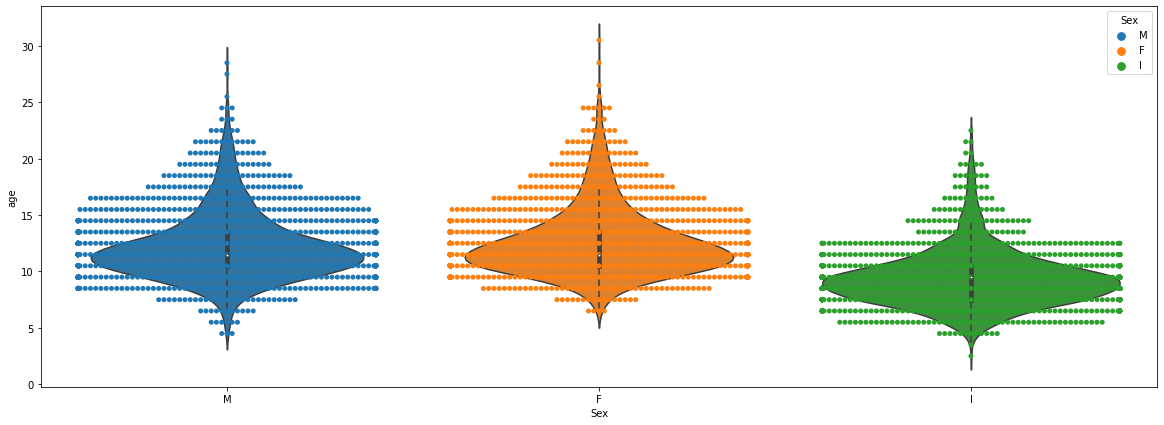

In [14]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = df)

## Perform descriptive statistics on the dataset

In [15]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


## Check for Missing values and deal with them

In [16]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

## Find the outliers and replace them outliers

In [17]:
# outlier handling
df = pd.get_dummies(df)
dummy_df = df

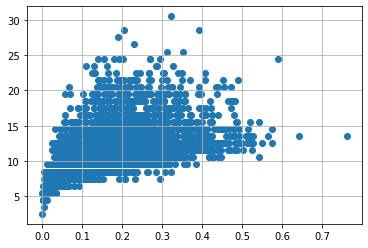

In [18]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [19]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['age'] > 25)].index, inplace = True)

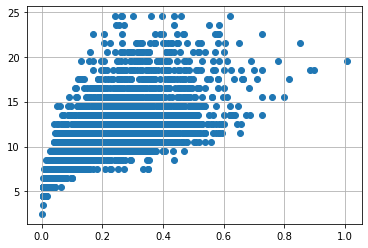

In [21]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [22]:
df.drop(df[(df['Shell weight'] > 0.6) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (
df['age'] > 25)].index, inplace = True)

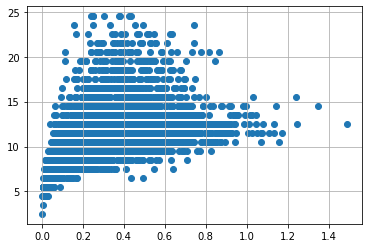

In [23]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [24]:
df.drop(df[(df['Shucked weight'] >= 1) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (
df['age'] > 20)].index, inplace = True)

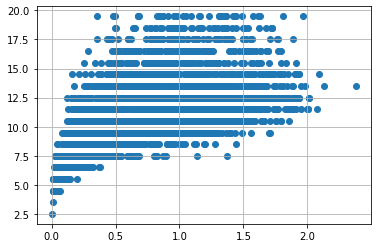

In [25]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [26]:
df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

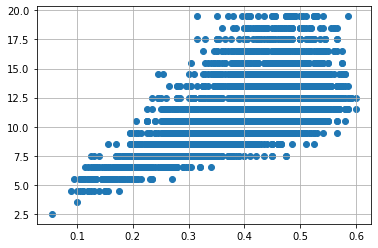

In [27]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [28]:
df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

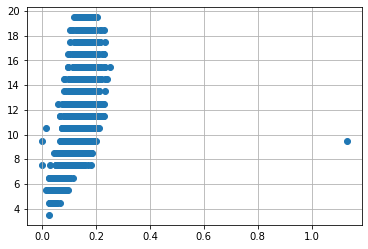

In [29]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [30]:
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

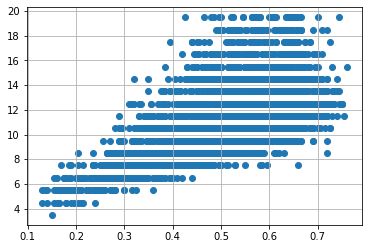

In [31]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [32]:
df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

## Feature Selection And Standardization

In [33]:
X = df.drop('age', axis = 1)
y = df['age']


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [36]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

## Building The Model ,Train the Model,Test the Model

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [40]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.606512
Mean Squared error of testing set :3.426529


In [41]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.52
R2 Score of testing set:0.56


### Support vector regression

In [46]:
from sklearn.svm import SVR

In [47]:
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)

SVR(kernel='linear')

In [48]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

svr.score(X_train, y_train)

0.44631816808992275

In [49]:
svr.score(X_test, y_test)

0.4825919330674323

### KNeighbors classifier

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [44]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


knn.score(X_train, y_train)

0.43577322259971274